# Question 4: Logistic Regression

The goal of this exercise is to find the weights and biases associated with the logistic regression algorithm that
classifies data into two classes (categories). Please use the jupyter notebook code template provided in conjunction with the following text to solve this question. The following convention should be used while answering the
questions in the notebook: Input array X, Label array Y , Predicted array Yb, Parameters θ, Number of Datapoints
N, i
th element of A being ai
.
You can use numpy, matplotlib and pandas libraries in this problem. Note: Make sure to consider and learn the
bias parameter in this problem.

In [1]:
#Import all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
%matplotlib inline

## Load the data

In [2]:
# load the data
# Perform important operations on the data
class_0 = pd.read_csv('class0-input.csv')
class_1 = pd.read_csv('class1-input.csv')
labels = pd.read_csv('labels.csv')

In [3]:
X = pd.concat([class_0,class_1],ignore_index = True)

## Check the shape

In [4]:
# Shape of X
# Shape of Y
print(X.shape)
print(labels.shape)

(10000, 2)
(10000, 1)


## Visualize the data

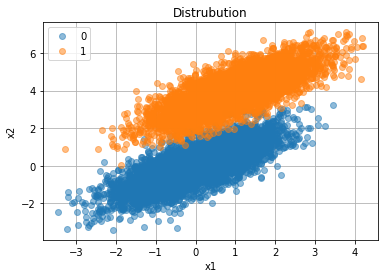

In [5]:
X['label'] = labels['label']
groups = X.groupby('label')
for name, group in groups:
    plt.plot(group.x1, group.x2, marker='o', linestyle='', label=name,alpha = 0.5)

plt.legend()
plt.title('Distrubution')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()
X.drop(['label'], axis=1,inplace =True)

## Define the required functions

In [6]:
# Pass in the required arguments
# Implement the sigmoid function
def sigmoid(x):
    
    transform = 1/(1+math.e**(-x))
    
    return transform

In [7]:
# Pass in the required arguments
# The function should return the gradients
def calculate_gradients(theta,X,Y):
    
    gradients = X.T.dot(sigmoid(X.dot(theta)) - Y)
    
    return gradients

In [8]:
# Update the weights using gradients calculated using above function and learning rate
# The function should return the updated weights to be used in the next step
def update_weights(prev_weights, current_grads, learning_rate):
    
    update_weight = prev_weights - learning_rate * current_grads
    
    return update_weight

In [9]:
# Use the implemented functions in the main function
# 'main' function should return weights after all the iterations
# Dont forget to divide by the number of datapoints wherever necessary!
# Initialize the intial weights randomly
def main(X, Y, weights, learning_rate = 0.00005, num_steps = 50000):
    
    weights = np.random.randn(3, 1) 
    print("Initial weight:",weights)
    X = np.c_[np.ones((len(X), 1)), X]
    m = len(X)
    
    for i in range(num_steps):
        
        gradients = 2/m * calculate_gradients(weights,X,Y)
       
        weights = weights - learning_rate * gradients

    return weights

In [10]:
# Pass in the required arguments (final weights and input)
# The function should return the predictions obtained using sigmoid function.
def predict(theta,X):
    
    X = np.c_[np.ones((len(X), 1)), X]
    y_pred = sigmoid(X.dot(theta))

    return y_pred

In [11]:
# Use the final weights to perform prediction using predict funtion
# Convert the predictions to '0' or '1'
# Calculate the accuracy using predictions and labels
weights = main(X,labels,weights=[0,0],learning_rate = 0.00005,num_steps = 50000)
pred = predict(weights,X)

print('The learned weights for the model are',weights[0],weights[1],weights[2])

pred_df = pd.DataFrame(pred,columns = ['prob'])
pred_df['pred_class'] = np.where(pred_df['prob'] <= 0.5, 0, 1)
count_correct = 0
total_count = len(X)
pred_df['ground_truth'] = labels.label
for index, row in pred_df.iterrows():
    if row.pred_class == row.ground_truth:
        count_correct += 1
accuracy = count_correct/total_count
print('Model Accuracy:',accuracy)

Initial weight: [[-1.60933694]
 [-1.46535413]
 [-0.20856237]]
The learned weights for the model are [-1.67168772] [-0.89781911] [1.43602116]
Model Accuracy: 0.9798


## Visualize the misclassification

Text(0, 0.5, 'x2')

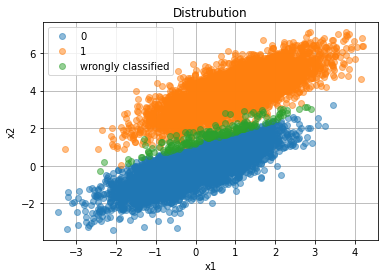

In [12]:
# Use different colors for class 0, class 1 and misclassified datapoints
# Use plt.scatter
# Dont forget to add axes titles, graph title, legend
result_df = pd.DataFrame(X)
result_df = result_df.join(labels.label)
result_df = result_df.join(pred_df.pred_class)
result_df['classification_for_plot'] = np.where(result_df['label']== result_df['pred_class'], result_df.label, 'wrongly classified')

groups = result_df.groupby('classification_for_plot')
for name, group in groups:
    plt.plot(group.x1, group.x2, marker='o', linestyle='', label=name,alpha= 0.5)

plt.legend()
plt.title('Distrubution')
plt.grid()
plt.xlabel('x1')
plt.ylabel('x2')

## Compare the results with sklearn's Logistic Regression

In [13]:
# import sklearn and necessary libraries
# Print the accuracy obtained by sklearn and your model
clf = LogisticRegression(random_state=0).fit(X, labels)
sklearn_predict = clf.predict(X)
print("sklearn Accuracy:",accuracy_score(labels, sklearn_predict))
print("Comparing model accruacy, my model has a accuracy of:", accuracy, "and the sklearn model accuracy is", accuracy_score(labels, sklearn_predict))

sklearn Accuracy: 0.9948
Comparing model accruacy, my model has a accuracy of: 0.9798 and the sklearn model accuracy is 0.9948


C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
